In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("C:/Users/raiti/OneDrive/Desktop/Projects/Python Project Healthcare/Python Project - Healthcare Census/Data/census_2011.csv")
raw_data.head(5)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0


### Problem Statement 1: (Keep the relevant data)
The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.

We may need the following columns.

State name

District name

Population

Male

Female

Literate

Male_Literate

Female_Literate

Rural_Households

Urban_Households

Households

Age_Group_0_29

Age_Group_30_49

Age_Group_50

Age not stated

Import the data to pandas and keep only the required columns. 

In [3]:
raw_data.columns.values

array(['District code', 'State name', 'District name', 'Population',
       'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate',
       'SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST',
       'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers',
       'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers',
       'Agricultural_Workers', 'Household_Workers', 'Other_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Others_Religions', 'Religion_Not_Stated', 'LPG_or_PNG_Households',
       'Housholds_with_Electric_Lighting', 'Households_with_Internet',
       'Households_with_Computer', 'Rural_Households', 'Urban_Households',
       'Households', 'Below_Primary_Education', 'Primary_Education',
       'Middle_Education', 'Secondary_Education', 'Higher_Education',
       'Graduate_Education', 'Other_Education', 'Literate_Education',
       'Illiterate_Education', 'Total_Education', 'Age_Group_0_29',
       'Age_Group_3

In [4]:
type(raw_data.columns.values)

numpy.ndarray

In [5]:
relevant_columns = ['State name','District name','Population','Male','Female',
                        'Literate','Male_Literate','Female_Literate','Rural_Households','Urban_Households',
                        'Households', 'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50', 'Age not stated']

total_columns = list(raw_data.columns.values)
total_columns

irrelevant_columns = list(set(total_columns)-set(relevant_columns))
df_relevant = raw_data.drop(irrelevant_columns, axis = 1)
df_relevant.head(5)

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


## Problem Statement 2: (Rename the Column names)
For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 

State name  to State/UT


District name  to District

Male_Literate to Literate_Male

Female_Literate to Literate_Female

Rural_Households  to Households_Rural

Urban_ Households  to Households_Urban

Age_Group_0_29 to Young_and_Adult

Age_Group_30_49 to Middle_Aged

Age_Group_50 to Senior_Citizen

Age not stated to Age_Not_Stated



In [6]:
df_relevant.columns.values

array(['State name', 'District name', 'Population', 'Male', 'Female',
       'Literate', 'Male_Literate', 'Female_Literate', 'Rural_Households',
       'Urban_Households', 'Households', 'Age_Group_0_29',
       'Age_Group_30_49', 'Age_Group_50', 'Age not stated'], dtype=object)

In [7]:
df_relevant.columns = ['State/UT', 'District', 'Population', 'Male', 'Female',
       'Literate', 'Literate_Male', 'Literate_Female', 'Households_Rural',
       'Households_Urban', 'Households', 'Young_and_Adult',
       'Middle_Aged', 'Senior_Citizen', 'Age_not_stated']

In [8]:
df_relevant.columns.values

array(['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate',
       'Literate_Male', 'Literate_Female', 'Households_Rural',
       'Households_Urban', 'Households', 'Young_and_Adult', 'Middle_Aged',
       'Senior_Citizen', 'Age_not_stated'], dtype=object)

In [9]:
df_renamed = df_relevant.copy()

## Problem Statement 3: (Rename State/UT Names)
The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.


Examples: 

Andaman and Nicobar Islands

Arunachal Pradesh

Bihar


In [10]:
def capital(st):
    for i in range(0,len(st)):
        st[i] = st[i].capitalize()
    st = ' '.join(st)
    return st

def lowerAnd(st):
    st = st.split()
    for i in range(0,len(st)):
        if st[i] == 'And':
            st[i] = st[i].lower()
        else:
            continue
    st = ' '.join(st)
    return st
    


df_renamed['State/UT'] = df_renamed['State/UT'].apply(lambda x:capital(x.split()))
df_renamed['State/UT'] = df_renamed['State/UT'].apply(lambda x:lowerAnd(x))
df_renamed['State/UT']

0                Jammu and Kashmir
1                Jammu and Kashmir
2                Jammu and Kashmir
3                Jammu and Kashmir
4                Jammu and Kashmir
                  ...             
635                    Pondicherry
636                    Pondicherry
637    Andaman and Nicobar Islands
638    Andaman and Nicobar Islands
639    Andaman and Nicobar Islands
Name: State/UT, Length: 640, dtype: object

## Problem Statement 4: (New State/UT formation)

In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.


In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the 
State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 


In [11]:
telangana_dist = ['Adilabad',
    'Nizamabad',
    'Karimnagar',
    'Medak',
    'Hyderabad',
    'Rangareddy',
    'Mahbubnagar',
    'Nalgonda',
    'Warangal',
    'Khammam']
    
df_renamed['State/UT'] = df_renamed.apply(lambda x:'Telangana' if x['District'] in telangana_dist else x['State/UT'], axis = 1)
df_renamed['State/UT'] = df_renamed.apply(lambda x:'Laddakh' if x['District'] in ['Leh','Kargil'] else x['State/UT'], axis = 1)
df_renamed

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_not_stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [12]:
df_renamed[df_renamed['District'] == "Leh(Ladakh)"]['State/UT']

2    Jammu and Kashmir
Name: State/UT, dtype: object

## Problem Statement 5: (Find and process Missing Data)
Find and store the percentage of data missing for each column.
Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

Hint:

Population = Male + Female

Literate = Literate_Male + Literate_Female

Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated

Households = Households_Rural + Households_Urban 

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 

In [13]:
df_renamed.head(5)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_not_stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [14]:
demo = df_renamed.copy()

In [15]:
demo['Population'] = demo['Population'].fillna(demo['Male']+demo['Female'])
demo['Male'] = demo['Male'].fillna(demo['Population']-demo['Female'])
demo['Female'] = demo['Female'].fillna(demo['Population']-demo['Male'])


In [16]:
demo.head(5)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_not_stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [17]:
demo['Literate'] = demo['Literate'].fillna(demo['Literate_Male']+demo['Literate_Female'])
demo['Literate_Male'] = demo['Literate_Male'].fillna(demo['Literate']-demo['Literate_Female'])
demo['Literate_Female'] = demo['Literate_Female'].fillna(demo['Literate']-demo['Literate_Male'])

In [18]:
demo.head(5)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_not_stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [19]:

demo['Population'] = demo['Population'].fillna(demo['Young_and_Adult']+demo['Middle_Aged']+demo['Senior_Citizen']+demo['Age_not_stated'])
demo.loc[demo['Population'].isnull(),:]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_not_stated
561,Karnataka,Dharwad,NaN,NaN,909817.0,1301664.0,711776.0,589888.0,199707.0,283397.0,483104.0,1017935.0,NaN,322577.0,823.0


In [20]:
demo['Households'] = demo['Households'].fillna(demo['Households_Rural']+demo['Households_Urban'])
demo['Households_Rural'] = demo['Households_Rural'].fillna(demo['Households']-demo['Households_Urban'])
demo['Households_Urban'] = demo['Households_Urban'].fillna(demo['Households']-demo['Households_Rural'])
demo.head(5)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_not_stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [21]:
demo['Population'] = demo['Population'].fillna(demo['Young_and_Adult']+demo['Middle_Aged']+demo['Senior_Citizen']+demo['Age_not_stated'])
demo['Young_and_Adult'] = demo['Young_and_Adult'].fillna(demo['Population']-(demo['Middle_Aged']+demo['Senior_Citizen']+demo['Age_not_stated']))
demo['Middle_Aged'] = demo['Middle_Aged'].fillna(demo['Population']-(demo['Young_and_Adult']+demo['Senior_Citizen']+demo['Age_not_stated']))
demo['Senior_Citizen'] = demo['Senior_Citizen'].fillna(demo['Population']-(demo['Young_and_Adult']+demo['Middle_Aged']+demo['Age_not_stated']))
demo['Age_not_stated'] = demo['Age_not_stated'].fillna(demo['Population']-(demo['Young_and_Adult']+demo['Middle_Aged']+demo['Senior_Citizen']))

In [22]:
demo.head(5)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_not_stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [23]:
before = pd.DataFrame(df_renamed.isnull().sum())
after = pd.DataFrame(demo.isnull().sum())

res = pd.concat([before, after], axis = 1, keys = ['Before', 'After'])

In [24]:
list(before.index) == list(after.index)

True

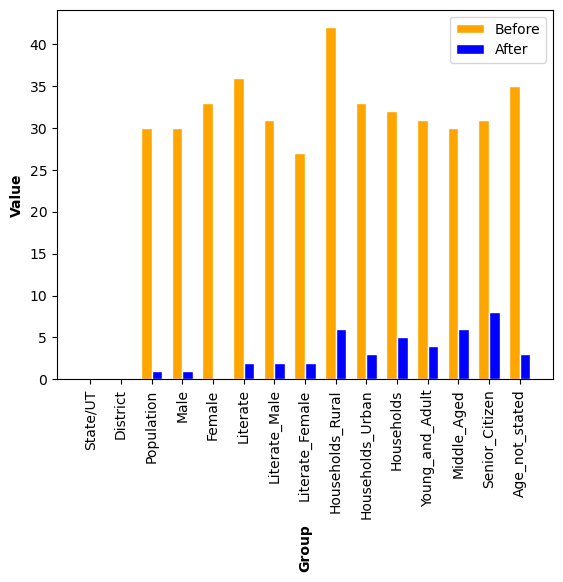

In [25]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data
labels = list(before.index)
data1 = list(before[0])
data2 = list(after[0])

# Set the width of the bars
barWidth = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(data1))
r2 = [x + barWidth for x in r1]

# Create the double bar plot
plt.bar(r1, data1, color='orange', width=barWidth, edgecolor='white', label='Before')
plt.bar(r2, data2, color='blue', width=barWidth, edgecolor='white', label='After')

# Add xticks on the middle of the group bars
plt.xlabel('Group', fontweight='bold', rotation = 90)
plt.ylabel('Value', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(data1))], labels)
plt.xticks(rotation = 90)

# Add legend
plt.legend()

# Show the plot
plt.show()



In [26]:
df_relevant_dist = demo.copy()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette('bright')

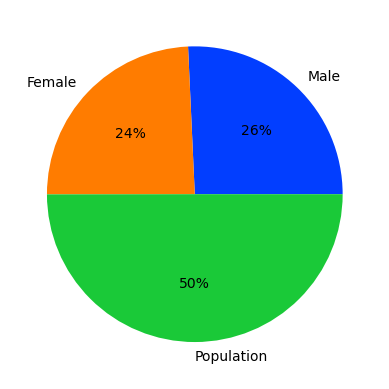

In [28]:
#(df_relevant_dist['Male'].sum()+df_relevant_dist['Female'].sum())-df_relevant_dist['Population'].sum()
Population_Pie = [df_relevant_dist['Male'].sum(),df_relevant_dist['Female'].sum(),df_relevant_dist['Population'].sum()]
plt.pie(Population_Pie, labels = ["Male","Female","Population"],colors = colors, autopct='%.0f%%')
plt.show()

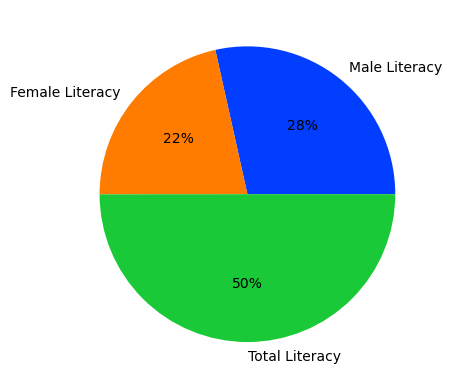

In [29]:
#(df_relevant_dist['Literate_Male'].sum()+df_relevant_dist['Literate_Female'].sum())-df_relevant_dist['Literate'].sum()
Literate_Pie = [df_relevant_dist['Literate_Male'].sum(),df_relevant_dist['Literate_Female'].sum(),df_relevant_dist['Literate'].sum()]
plt.pie(Literate_Pie, labels = ["Male Literacy","Female Literacy","Total Literacy"],colors = colors, autopct='%.0f%%')
plt.show()

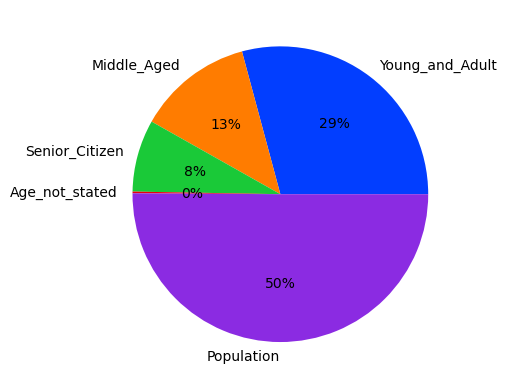

In [30]:
#(df_relevant_dist['Young_and_Adult'].sum()+df_relevant_dist['Middle_Aged'].sum()+df_relevant_dist['Senior_Citizen'].sum()+df_relevant_dist['Age_not_stated'].sum())-df_relevant_dist['Population'].sum()
Age_Pie = [df_relevant_dist['Young_and_Adult'].sum(),df_relevant_dist['Middle_Aged'].sum(),df_relevant_dist['Senior_Citizen'].sum(),df_relevant_dist['Age_not_stated'].sum(),df_relevant_dist['Population'].sum()]
plt.pie(Age_Pie, labels = ["Young_and_Adult","Middle_Aged","Senior_Citizen","Age_not_stated","Population"],colors = colors, autopct='%.0f%%')
plt.show()

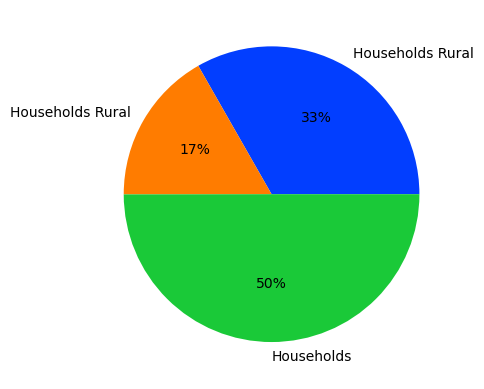

In [31]:
#(df_relevant_dist['Households_Rural'].sum()+df_relevant_dist['Households_Urban'].sum())-df_relevant_dist['Households'].sum()
Households_Pie = [df_relevant_dist['Households_Rural'].sum(),df_relevant_dist['Households_Urban'].sum(),df_relevant_dist['Households'].sum()]
plt.pie(Households_Pie, labels = ["Households Rural","Households Rural","Households"],colors = colors, autopct='%.0f%%')
plt.show()

In [32]:
Labels = ["Total Records","Missing Records","Missing Percentage"]
index = ['Population','Literate','Households']

Population = [int(len(df_relevant_dist['Population'])),df_relevant_dist['Population'].isnull().sum(),(df_relevant_dist['Population'].isnull().sum()/len(df_relevant_dist['Population']))*100]
Literate = [int(len(df_relevant_dist['Literate'])),df_relevant_dist['Literate'].isnull().sum(),(df_relevant_dist['Literate'].isnull().sum()/len(df_relevant_dist['Literate']))*100]
Households = [int(len(df_relevant_dist['Households'])),df_relevant_dist['Households'].isnull().sum(),(df_relevant_dist['Households'].isnull().sum()/len(df_relevant_dist['Households']))*100]

data = [Population,Literate,Population]

df_missing_records = pd.DataFrame(data, columns = Labels, index = index)
df_missing_records

,Total Records,Missing Records,Missing Percentage
Population,640,1,0.15625
Literate,640,2,0.31250
Households,640,1,0.15625


### Filling Nan Values to all columns of the dataframe

State/UT ------- 0
District ------- 0
Population ------- 1
Male ------- 1
Female ------- 0
Literate ------- 2
Literate_Male ------- 2
Literate_Female ------- 2
Households_Rural ------- 6
Households_Urban ------- 3
Households ------- 5
Young_and_Adult ------- 4
Middle_Aged ------- 6
Senior_Citizen ------- 8
Age_not_stated ------- 3


<AxesSubplot:>

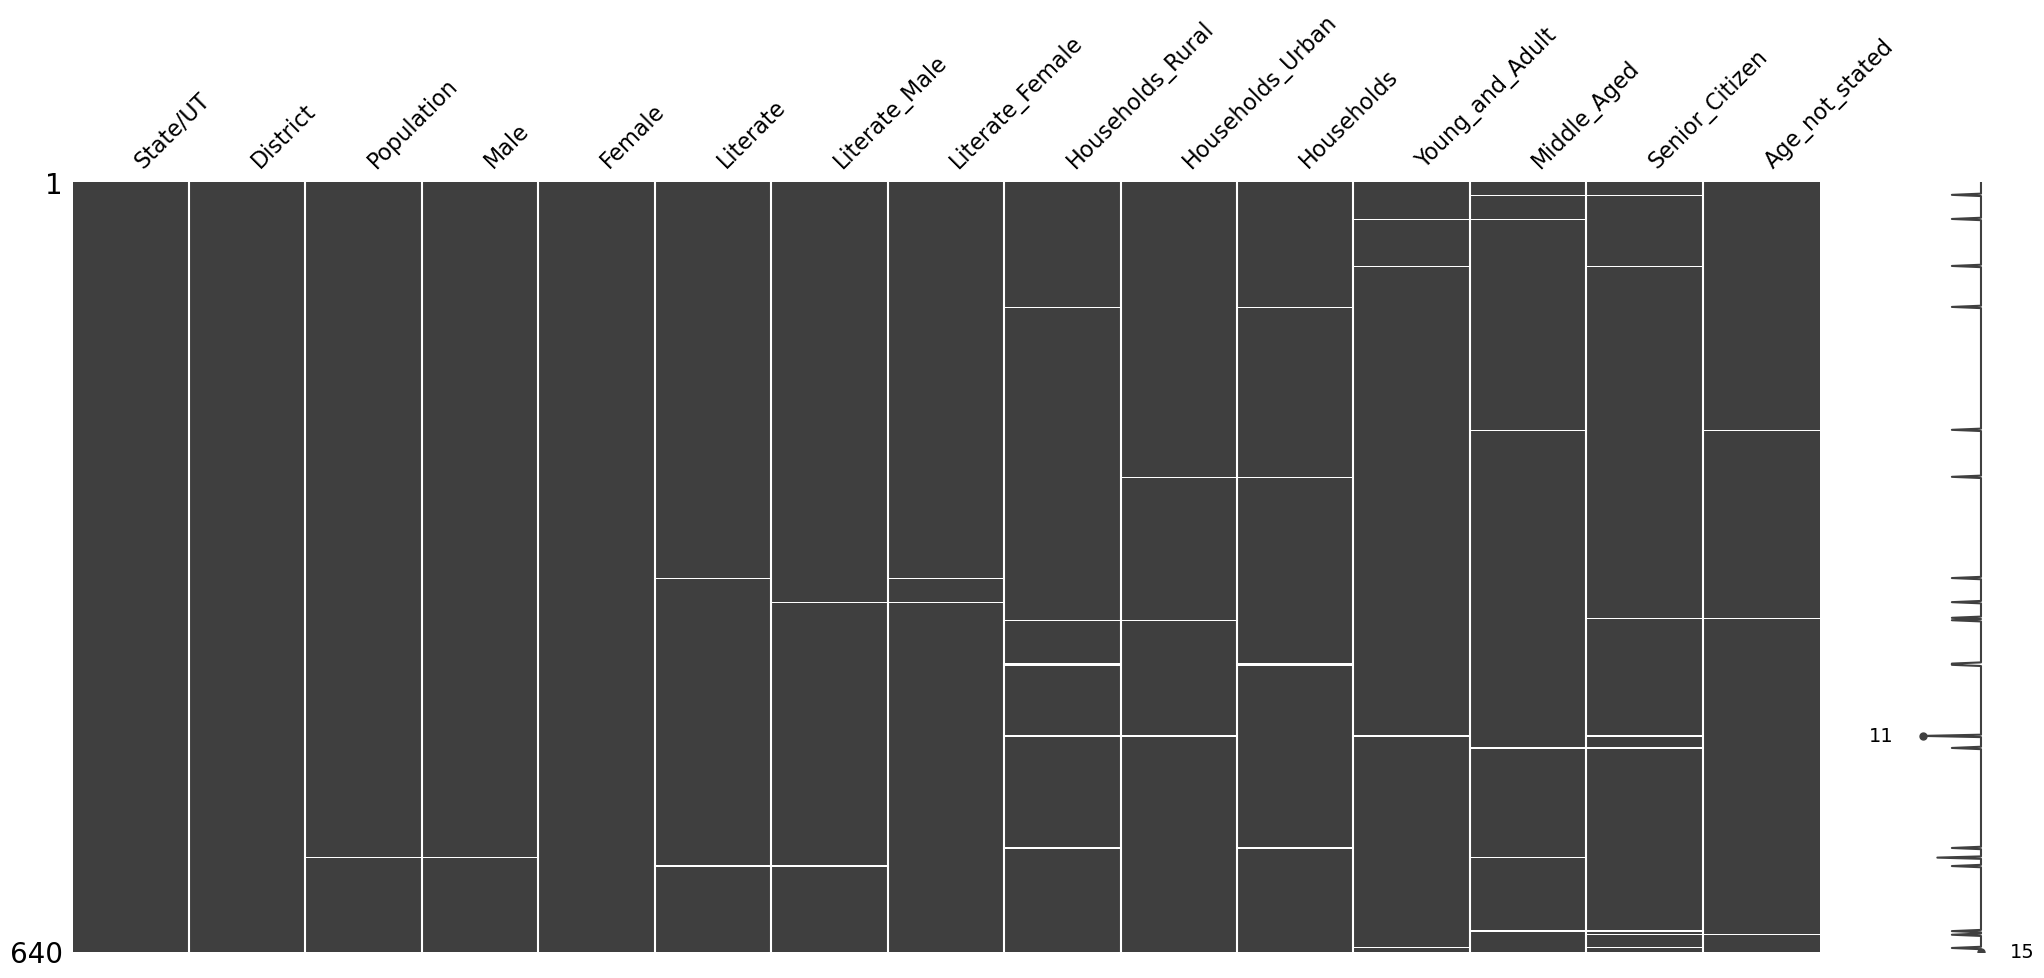

In [33]:
df_before_refined = df_relevant_dist.copy()
for i in df_before_refined.columns:
    print(i, "-------", df_before_refined[i].isnull().sum())
    
import missingno as msno
msno.matrix(df_before_refined)

## Problem Statement 6: (Save Data)
Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.

In [37]:
df_before_refined.to_csv("C:/Users/raiti/OneDrive/Desktop/Projects/Python Project Healthcare/Python Project - Healthcare Census/Clean_Data/census.csv")